<a href="https://colab.research.google.com/github/sh-shrey/ML/blob/main/Model%20training%20using%20tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


classification with tensorflow 2.0

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [ ]:
print(tf.__version__)

2.4.0


In [ ]:
import pandas as pd
df= pd.read_csv('/content/gdrive/MyDrive/final_analysis.csv')

In [ ]:
df.head()

,gender,N1,N2,N5,N6,N8,N9,N10,A9,C9,lack_of_concentration,tiredness,sleep_hour,Mood_prediction
0,1,1,5,1,1,1,1,1,4,4,0,0,0,1
1,2,2,3,3,4,2,2,4,4,4,0,0,0,0
2,2,5,1,5,5,5,5,5,5,5,1,1,1,0
3,2,5,4,4,5,5,4,5,4,2,1,1,1,0
4,2,3,3,3,3,3,3,4,5,3,0,0,0,0


In [ ]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size

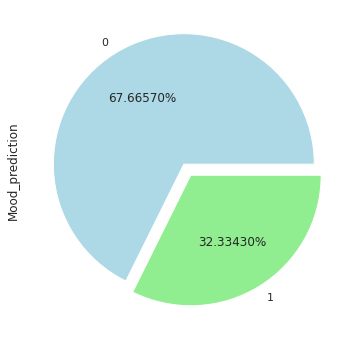

In [ ]:
df.Mood_prediction.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05))

In [ ]:
gender = pd.get_dummies(df.gender, prefix='gender')
N1 = pd.get_dummies(df.N1, prefix='N1')
N2 = pd.get_dummies(df.N2, prefix='N2')
N5 = pd.get_dummies(df.N5, prefix='N5')
N6 = pd.get_dummies(df.N6, prefix='N6')
N8 = pd.get_dummies(df.N8, prefix='N8')
N9 = pd.get_dummies(df.N9, prefix='N9')
N10 = pd.get_dummies(df.N10, prefix='N10')
A9 = pd.get_dummies(df.A9, prefix='A9')
C9 = pd.get_dummies(df.C9, prefix='C9')
N10 = pd.get_dummies(df.N10, prefix='N10')
concentration = pd.get_dummies(df.lack_of_concentration, prefix='concentration')
tiredeness = pd.get_dummies(df.tiredness, prefix='tiredness')
sleep_hour = pd.get_dummies(df.sleep_hour, prefix='sleep_hour')
labels = pd.get_dummies(df.Mood_prediction, prefix='condition')

In [ ]:
X = pd.concat([gender,N1,N2,N5,N6,N8,N9,N10,A9,C9,concentration,tiredeness,sleep_hour] , axis=1)

In [ ]:
labels.head()

,condition_0,condition_1
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
y = labels.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [ ]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                975       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 1,157
Trainable params: 1,157
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
1183/1183 [==============================] - 3s 2ms/step - loss: 0.3183 - acc: 0.8262 - val_loss: 0.0391 - val_acc: 0.9941
Epoch 2/50
1183/1183 [==============================] - 2s 1ms/step - loss: 0.0351 - acc: 0.9914 - val_loss: 0.0304 - val_acc: 0.9844
Epoch 3/50
1183/1183 [==============================] - 2s 1ms/step - loss: 0.0240 - acc: 0.9942 - val_loss: 0.0146 - val_acc: 0.9958
Epoch 4/50
1183/1183 [==============================] - 2s 2ms/step - loss: 0.0121 - acc: 0.9976 - val_loss: 0.0079 - val_acc: 0.9983
Epoch 5/50
1183/1183 [==============================] - 2s 2ms/step - loss: 0.0062 - acc: 0.9996 - val_loss: 0.0046 - val_acc: 0.9992
Epoch 6/50
1183/1183 [==============================] - 2s 2ms/step - loss: 0.0035 - acc: 0.9996 - val_loss: 0.0041 - val_acc: 0.9992
Epoch 7/50
1183/1183 [==============================] - 2s 2ms/step - loss: 0.0021 - acc: 0.9997 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 8/50
1183/1183 [==============================] - 2s 1ms

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


INFO:tensorflow:Assets written to: /tmp/tmpv7yu_96a/assets


In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from google.colab import files
pbfile = files.upload()

In [ ]:
tflite_file = 'model.tflite'
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [ ]:
files.download(tflite_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>